In [1]:
import pandas as pd
import numpy as np

Reading the ATC and Drug name files and making them in one DF

link for dataset
http://sideeffects.embl.de/download/

In [2]:
df_names = pd.read_csv('drug_names.tsv', sep='\t')

In [3]:
df_names.describe

<bound method NDFrame.describe of       CID100000085                 carnitine
0     CID100000119        gamma-aminobutyric
1     CID100000137          5-aminolevulinic
2     CID100000143                leucovorin
3     CID100000146  5-methyltetrahydrofolate
4     CID100000158                      PGE2
...            ...                       ...
1424  CID156603655                pegaptanib
1425  CID156842239                       n-3
1426  CID170683024                         x
1427  CID170695640             colestyramine
1428  CID171306834                      K779

[1429 rows x 2 columns]>

In [4]:
drugname={}
with open("drug_names.tsv") as f:
    for line in f:
        (key, value)=line.split()
        drugname[key]=value
drugname

{'CID100000085': 'carnitine',
 'CID100000119': 'gamma-aminobutyric',
 'CID100000137': '5-aminolevulinic',
 'CID100000143': 'leucovorin',
 'CID100000146': '5-methyltetrahydrofolate',
 'CID100000158': 'PGE2',
 'CID100000159': 'prostacyclin',
 'CID100000160': 'prostaglandin',
 'CID100000175': 'acetate',
 'CID100000187': 'acetylcholine',
 'CID100000191': 'adenosine',
 'CID100000206': 'glucose',
 'CID100000214': 'PGE1',
 'CID100000222': 'ammonia',
 'CID100000232': 'arginine',
 'CID100000244': 'benzyl',
 'CID100000247': 'betaine',
 'CID100000271': 'calcium',
 'CID100000297': 'graphene',
 'CID100000298': 'chloramphenicol',
 'CID100000303': 'bile',
 'CID100000305': 'choline',
 'CID100000311': 'citric',
 'CID100000312': 'chloride',
 'CID100000338': 'salicylate',
 'CID100000401': 'D-cycloserine',
 'CID100000444': 'bupropion',
 'CID100000450': 'estradiol',
 'CID100000453': 'mannitol',
 'CID100000564': 'EACA',
 'CID100000581': 'N-acetylcysteine',
 'CID100000596': 'cytarabine',
 'CID100000598': 'me

In [5]:
df_atc = pd.read_csv('drug_atc.tsv', sep='\t',header = None)
df_atc

,0,1
0,CID100000085,A16AA01
1,CID100000119,L03AA03
2,CID100000119,N03AG03
3,CID100000137,L01XD04
4,CID100000143,V03AF03
...,...,...
1555,CID154681041,J01AA12
1556,CID154687131,J01AA04
1557,CID156603655,S01LA03
1558,CID170695640,C10AC01


In [6]:
print(df_atc.isnull().sum())

0    0
1    0
dtype: int64


In [7]:
df_atc['drugname'] = df_atc[0].map(drugname)

In [8]:
df_atc.rename(columns = {0:'ATC'}, inplace = True)
df_atc

,ATC,1,drugname
0,CID100000085,A16AA01,carnitine
1,CID100000119,L03AA03,gamma-aminobutyric
2,CID100000119,N03AG03,gamma-aminobutyric
3,CID100000137,L01XD04,5-aminolevulinic
4,CID100000143,V03AF03,leucovorin
...,...,...,...
1555,CID154681041,J01AA12,tigecycline
1556,CID154687131,J01AA04,lymecycline
1557,CID156603655,S01LA03,pegaptanib
1558,CID170695640,C10AC01,colestyramine


Reading the Symptoms file

In [9]:
df_symp = pd.read_csv('meddra_all_se.tsv', sep='\t',header = None)

In [10]:
df_symp.describe()

,0,1,2,3,4,5
count,309849,309849,309849,308948,308948,309849
unique,1430,1556,5868,2,6060,6123
top,CID100002771,CID000060795,C0015230,PT,C0012833,Dizziness
freq,2185,1610,3459,163206,2826,2826


In [11]:
df_symp.rename(columns = {0:'ID_Flat'}, inplace = True)
df_symp.rename(columns = {1:'ID_Stereo'}, inplace = True)
df_symp.rename(columns = {2:'UMLS_ID_label'}, inplace = True)
df_symp.rename(columns = {3:'MedDRA'}, inplace = True)
df_symp.rename(columns = {4:'UMLS'}, inplace = True)
df_symp.rename(columns = {5:'side_effect_name'}, inplace = True)

In [12]:
print(df_symp.isnull().sum())

ID_Flat               0
ID_Stereo             0
UMLS_ID_label         0
MedDRA              901
UMLS                901
side_effect_name      0
dtype: int64


In [13]:
df_symp['drugname'] = df_symp['ID_Flat'].map(drugname)

In [14]:
df_symp

,ID_Flat,ID_Stereo,UMLS_ID_label,MedDRA,UMLS,side_effect_name,drugname
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps,carnitine
1,CID100000085,CID000010917,C0000729,PT,C0000737,Abdominal pain,carnitine
2,CID100000085,CID000010917,C0000737,LLT,C0000737,Abdominal pain,carnitine
3,CID100000085,CID000010917,C0000737,PT,C0687713,Gastrointestinal pain,carnitine
4,CID100000085,CID000010917,C0000737,PT,C0000737,Abdominal pain,carnitine
...,...,...,...,...,...,...,...
309844,CID171306834,CID071306834,C3203358,PT,C1145670,Respiratory failure,K779
309845,CID171306834,CID071306834,C3665386,LLT,C3665386,Abnormal vision,K779
309846,CID171306834,CID071306834,C3665386,PT,C3665347,Visual impairment,K779
309847,CID171306834,CID071306834,C3665596,LLT,C3665596,Warts,K779


In [15]:
df_symp[['drugname','ID_Flat','side_effect_name']]

,drugname,ID_Flat,side_effect_name
0,carnitine,CID100000085,Abdominal cramps
1,carnitine,CID100000085,Abdominal pain
2,carnitine,CID100000085,Abdominal pain
3,carnitine,CID100000085,Gastrointestinal pain
4,carnitine,CID100000085,Abdominal pain
...,...,...,...
309844,K779,CID171306834,Respiratory failure
309845,K779,CID171306834,Abnormal vision
309846,K779,CID171306834,Visual impairment
309847,K779,CID171306834,Warts


In [16]:
df_symp[['drugname','side_effect_name']].describe()

,drugname,side_effect_name
count,309849,309849
unique,1347,6123
top,citalopram,Dizziness
freq,2185,2826


In [17]:
df_symp[['side_effect_name']].value_counts()

side_effect_name           
Dizziness                      2826
Nausea                         2601
Headache                       2416
Rash                           2403
Vomiting                       2345
                               ... 
Fungus sputum test positive       1
Fungal test positive              1
Fungal rash                       1
Friction rub                      1
Fasting hyperglycaemia            1
Length: 6123, dtype: int64

In [21]:
df_symp[['drugname','ID_Flat','side_effect_name']].sort_values(by=['side_effect_name']).to_csv('Table_2A_side_effect.csv',index=False)

In [27]:
df3=df_symp[['drugname','side_effect_name']]

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['drugname','side_effect_name']
encoder = LabelEncoder()
for ftr in ftr_list:
    df3[ftr] = encoder.fit_transform(df3[ftr])
    print(encoder.classes_)

df3

['1,25(OH)2D3' '17-hydroxyprogesterone' '18F-FDG' ... 'zonisamide'
 'zopiclone' 'zuclopenthixol']
["5'nucleotidase increased" 'AGEP' 'AIDS dementia complex' ...
 'Zygomycosis' 'pH urine decreased' 'pH urine increased']


<ipython-input-29-e5b3c0e7fe82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[ftr] = encoder.fit_transform(df3[ftr])


,drugname,side_effect_name
0,327,14
1,327,24
2,327,24
3,327,2363
4,327,24
...,...,...
309844,74,4929
309845,74,51
309846,74,6005
309847,74,6059


[[ 371.21517116  327.53195724]
 [1056.79516164 3925.00322193]
 [1015.54009146 5890.33483232]
 [ 376.71768802 1636.84076137]
 [ 348.84356844 5738.23646631]
 [ 650.10433999 2759.77211592]
 [1037.59048796  328.07181762]
 [1039.59454968 1628.27246831]
 [1046.82896351 4687.23482061]
 [ 375.38401764 3663.56638192]
 [ 235.10282737 2937.97540418]
 [ 392.58867052 4236.39637765]
 [1135.40839311 2757.04954079]
 [ 345.4679948   967.34638372]
 [ 363.7610732  4948.37200589]
 [ 335.78604806 2243.21068091]
 [1003.98883185 5357.56527469]
 [1022.69781753  965.04955694]
 [1001.06838124 3363.50552194]
 [1016.37149318 2167.3741785 ]]


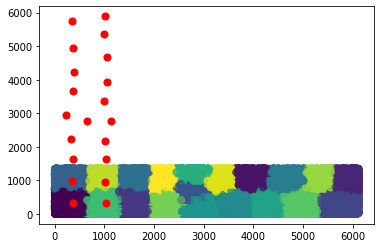

In [25]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20).fit(df3)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df3['side_effect_name'], df3['drugname'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [30]:
df_symp1 = df_symp[['drugname','side_effect_name']]
df_symp1

,drugname,side_effect_name
0,carnitine,Abdominal cramps
1,carnitine,Abdominal pain
2,carnitine,Abdominal pain
3,carnitine,Gastrointestinal pain
4,carnitine,Abdominal pain
...,...,...
309844,K779,Respiratory failure
309845,K779,Abnormal vision
309846,K779,Visual impairment
309847,K779,Warts


In [32]:
new_dict={}
with df_symp1 as f:
    for line in f:
        (key, value)=line.split()
        new_dict[key]=value
new_dict

AttributeError: __enter__